In [151]:
# importing the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data,wb
import pandas_datareader.data as net
import datetime
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator,DateLocator,MONDAY
import matplotlib.dates as mpl_dates
from pandas.plotting import scatter_matrix
import datetime
%matplotlib inline

In [161]:
# getting the data from yahoo finance
start = datetime.datetime(2010,1,2)
end = datetime.datetime(2019,1,2)

# getting ford data
ford = net.DataReader('F','yahoo',start,end)
ford.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,10.28,10.05,10.17,10.28,60855800.0,7.087058
2010-01-05,11.24,10.40,10.45,10.96,215620200.0,7.555854
2010-01-06,11.46,11.13,11.21,11.37,200070600.0,7.838508
2010-01-07,11.69,11.32,11.46,11.66,130201700.0,8.038436
2010-01-08,11.74,11.46,11.67,11.69,130463000.0,8.059114


In [141]:
# getting apple data
apple = net.DataReader('AAPL','yahoo',start,end)
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.601469
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.647457
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.223597
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.175119
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.349140


In [142]:
# getting google data
google = net.DataReader('GOOGL','yahoo',start,end)
google.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,315.070068,312.432434,313.788788,313.688690,3908400.0,313.688690
2010-01-05,314.234222,311.081085,313.903900,312.307312,6003300.0,312.307312
2010-01-06,313.243256,303.483490,313.243256,304.434448,7949400.0,304.434448
2010-01-07,305.305298,296.621613,305.005005,297.347351,12815700.0,297.347351
2010-01-08,301.926941,294.849854,296.296295,301.311310,9439100.0,301.311310


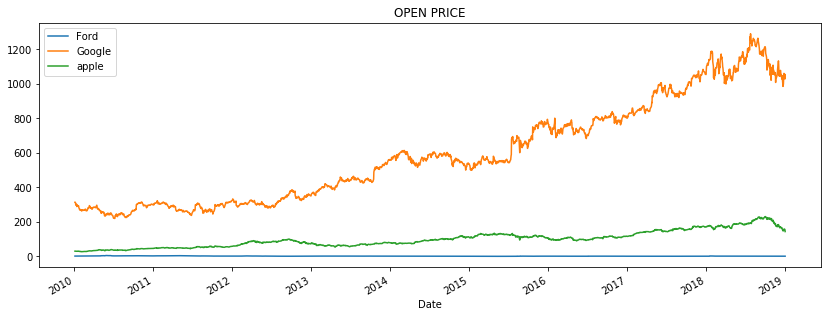

In [143]:
# visualizing the data and creating candlestick chart
# for open price
ford['Open'].plot(label='Ford' , figsize=(14,5),title='OPEN PRICE')
google['Open'].plot(label='Google')
apple['Open'].plot(label='apple')
plt.legend()

Text(0,0.5,'Price')

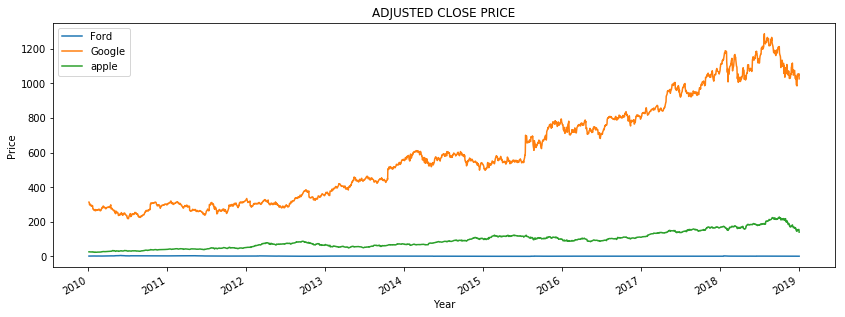

In [145]:
# for close price
ford['Adj Close'].plot(label='Ford' , figsize=(14,5),title='ADJUSTED CLOSE PRICE')
google['Adj Close'].plot(label='Google')
apple['Adj Close'].plot(label='apple')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Price')

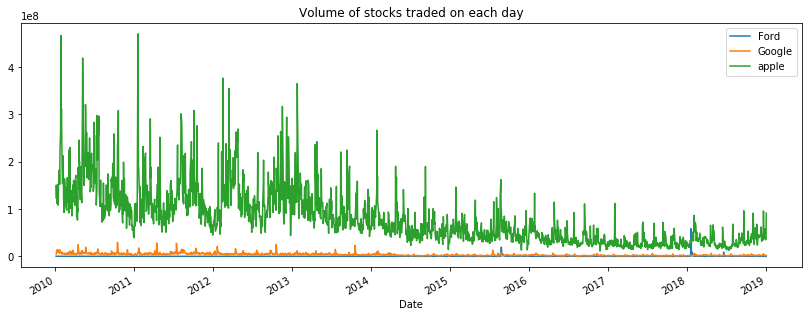

In [27]:
# to check the voulme of stock traded on each day. Plotting
# for close price
ford['Volume'].plot(label='Ford' , figsize=(14,5),title='Volume of stocks traded on each day')
google['Volume'].plot(label='Google')
apple['Volume'].plot(label='apple')
plt.legend()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,54.799999,53.389999,54.320000,54.799999,53778000.0,50.708462
2016-01-05,55.389999,54.540001,54.930000,55.049999,34079700.0,50.939793
2016-01-06,54.400002,53.639999,54.320000,54.049999,39518900.0,50.014458
2016-01-07,53.490002,52.070000,52.700001,52.169998,56564900.0,48.274826
2016-01-08,53.279999,52.150002,52.369999,52.330002,48754000.0,48.422878


In [42]:
# To find about the dates on which max trading was done.
# idxmax() function gets the row label of the maximum value
print 'Max trading volume (ford) was done on : ',ford['Volume'].idxmax()
print 'Max trading volume (google) was done on : ',google['Volume'].idxmax()
print 'Max trading volume (apple) was done on : ',apple['Volume'].idxmax()


Max trading volume (ford) was done on :  2018-01-19 00:00:00
Max trading volume (google) was done on :  2010-10-15 00:00:00
Max trading volume (apple) was done on :  2011-01-18 00:00:00


Text(0.5,0,'Date')

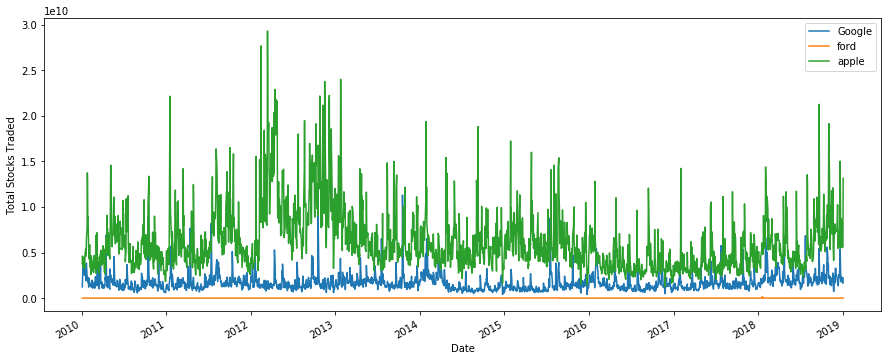

In [47]:
# If we observe the Open figure chart then google is  more valuable company just according to the stock prices.
# checking the market cap of the companies
# creating total stocks traded column
google['total stocks traded'] = google['Open']*google['Volume']
ford['total stocks traded'] = ford['Open']*ford['Volume']
apple['total stocks traded'] = apple['Open']*apple['Volume']

# plotting the total stocks traded column against time index.
google['total stocks traded'].plot(label='Google',figsize=(15,6))
ford['total stocks traded'].plot(label='ford')
apple['total stocks traded'].plot(label='apple')
plt.legend()
plt.ylabel('Total Stocks Traded')
plt.xlabel('Date')




In [48]:
# If we observe we see huge amount of apple stocks were traded in early 2012
# to get specific date.
apple['total stocks traded'].idxmax()

Timestamp('2012-03-14 00:00:00')

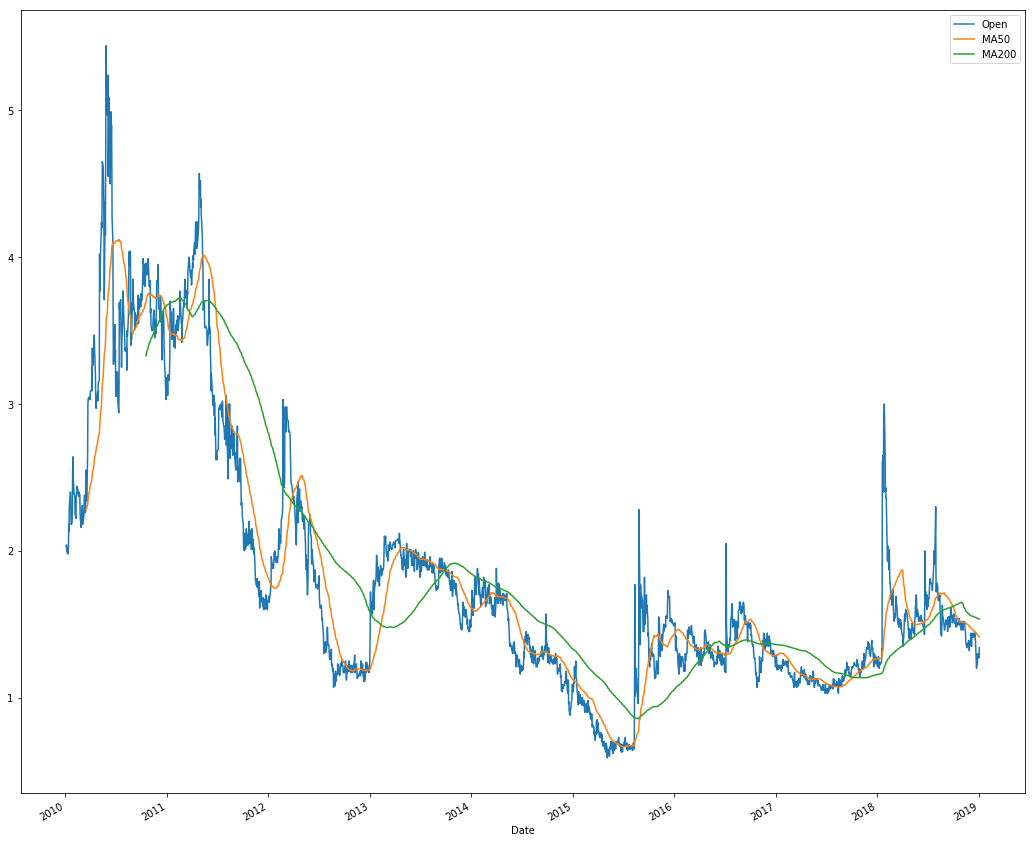

In [49]:
# moving average smoothes out the visual representation of the market. and creates a pattern which we may not observe.
# plotting the moving averages
ford['MA50'] = ford['Open'].rolling(50).mean()
ford['MA200'] = ford['Open'].rolling(200).mean()
ford[['Open','MA50','MA200']].plot(label='Ford',figsize=(18,16))


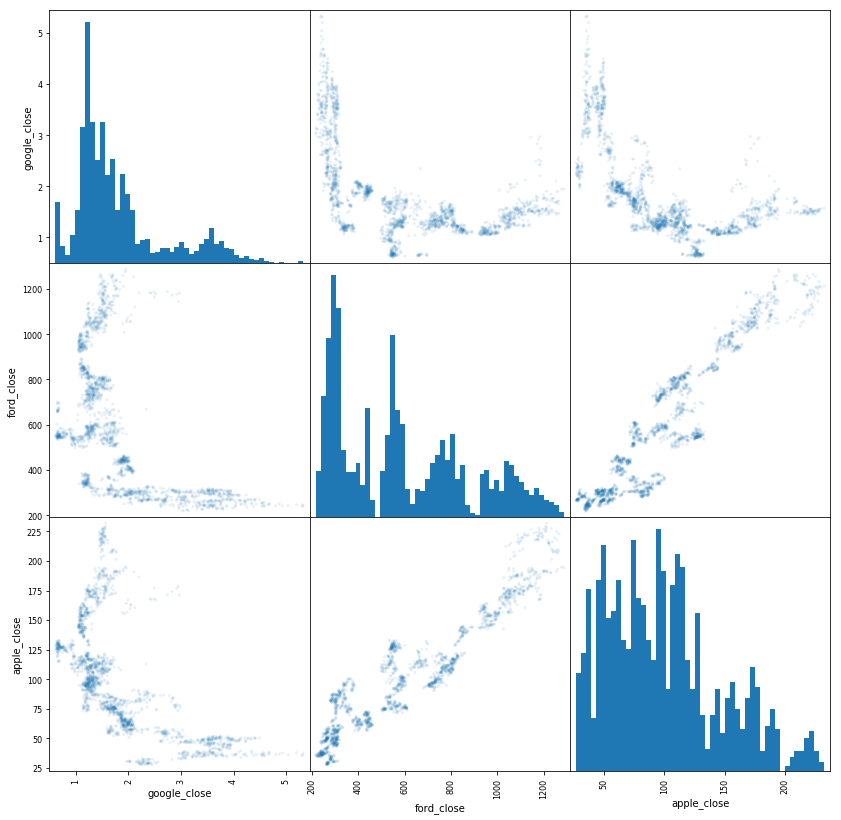

In [56]:
# to check the relationship we use scatter plot
compare = pd.concat([ford['Close'],google['Close'],apple['Close']],axis=1)
compare.columns = ['google_close','ford_close','apple_close']
scatter_matrix(compare,figsize=(14,14),alpha=0.1,hist_kwds={'bins':50});

In [64]:
# first getting the columns
apple_ne = apple.loc['2016-12':'2019-05'].reset_index()
apple_ne['date_dx'] = apple_ne['Date'].apply(lambda date:date2num(date))
apple_ne.head()

,Date,High,Low,Open,Close,Volume,Adj Close,total stocks traded,date_dx
0,2016-12-01,110.940002,109.029999,110.370003,109.489998,37086900.0,104.591812,4.093281e+09,736299.0
1,2016-12-02,110.089996,108.849998,109.169998,109.900002,26528000.0,104.983475,2.896062e+09,736300.0
2,2016-12-05,110.029999,108.250000,110.000000,109.110001,34324500.0,104.228821,3.775695e+09,736303.0
3,2016-12-06,110.360001,109.190002,109.500000,109.949997,26195500.0,105.031227,2.868407e+09,736304.0
4,2016-12-07,111.190002,109.160004,109.260002,111.029999,29998700.0,106.062927,3.277658e+09,736305.0


In [101]:
# calculating the returns for the google close column
google['returns'] = google['Close'].pct_change(1)
ford['returns'] = ford['Close'].pct_change(1)
apple_ne['returns'] = apple_ne['Close'].pct_change(1)
google.head()

,High,Low,Open,Close,Volume,Adj Close,total stocks traded,returns
Date,,,,,,,,
2010-01-04,315.070068,312.432434,313.788788,313.688690,3908400.0,313.688690,1.226412e+09,NaN
2010-01-05,314.234222,311.081085,313.903900,312.307312,6003300.0,312.307312,1.884459e+09,-0.004404
2010-01-06,313.243256,303.483490,313.243256,304.434448,7949400.0,304.434448,2.490096e+09,-0.025209
2010-01-07,305.305298,296.621613,305.005005,297.347351,12815700.0,297.347351,3.908853e+09,-0.023280
2010-01-08,301.926941,294.849854,296.296295,301.311310,9439100.0,301.311310,2.796770e+09,0.013331


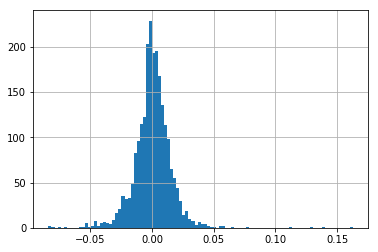

In [94]:
# Plotting the histograms
google['returns'].hist(bins=100);

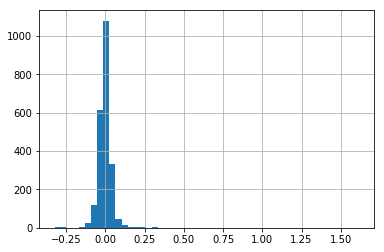

In [97]:
ford['returns'].hist(bins=50);

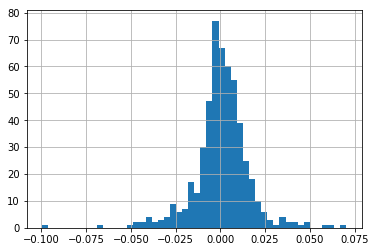

In [104]:
apple_ne['returns'].hist(bins=50);

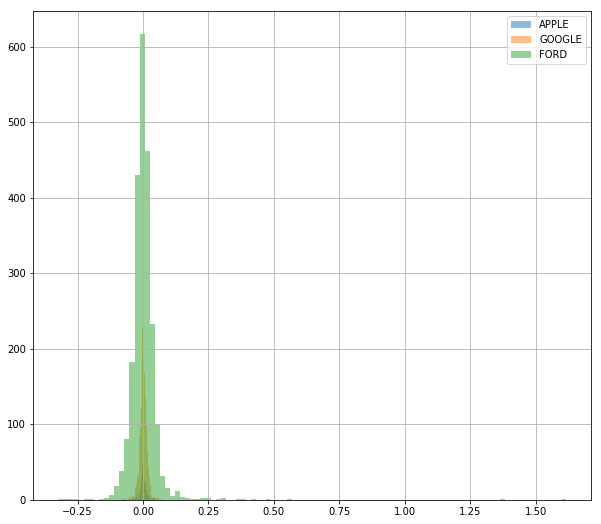

In [108]:
# comparing three together
apple_ne['returns'].hist(bins=100,label='APPLE',figsize=(10,9),alpha=0.5)
google['returns'].hist(bins=100,label='GOOGLE',figsize=(10,9),alpha=0.5)
ford['returns'].hist(bins=100,label='FORD',figsize=(10,9),alpha=0.5)
plt.legend()


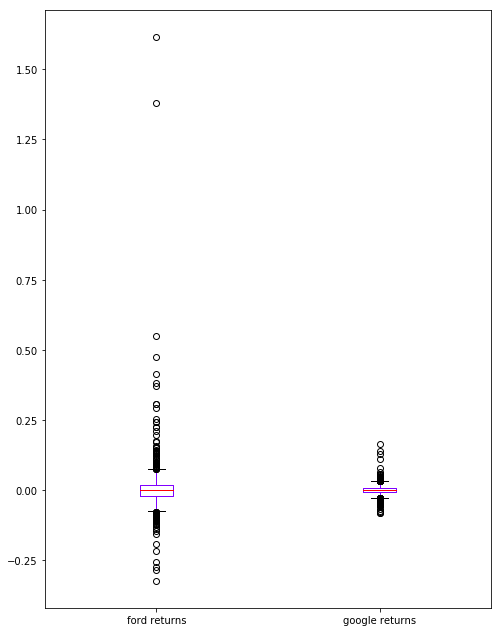

In [115]:
# making box plots to getting returns of ford and google
box_plot = pd.concat([ford['returns'],google['returns']],axis=1)
box_plot.columns =['ford returns','google returns']
box_plot.plot(kind='box',figsize=(8,11),colormap='rainbow')

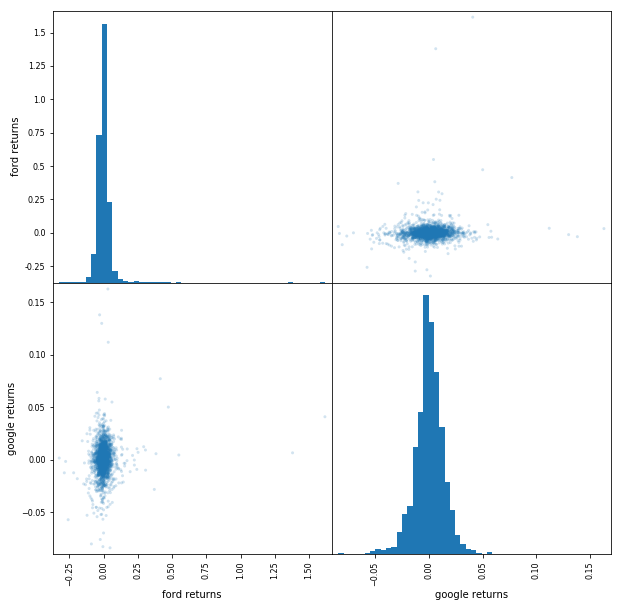

In [116]:
scatter_matrix(box_plot,figsize=(10,10),alpha=0.2,hist_kwds={'bins':50});

In [119]:
# Finding Cumulative returns.
# if it is above 1 then it is profit or else loss
apple_ne['cumulative return'] = (1+apple_ne['returns']).cumprod()
google['cumulative return'] = (1+google['returns']).cumprod()
ford['cumulative return'] = (1+ford['returns']).cumprod()

In [121]:
apple_ne.head()

,Date,High,Low,Open,Close,Volume,Adj Close,total stocks traded,date_dx,returns,cumulative return
0,2016-12-01,110.940002,109.029999,110.370003,109.489998,37086900.0,104.591812,4.093281e+09,736299.0,NaN,NaN
1,2016-12-02,110.089996,108.849998,109.169998,109.900002,26528000.0,104.983475,2.896062e+09,736300.0,0.003745,1.003745
2,2016-12-05,110.029999,108.250000,110.000000,109.110001,34324500.0,104.228821,3.775695e+09,736303.0,-0.007188,0.996529
3,2016-12-06,110.360001,109.190002,109.500000,109.949997,26195500.0,105.031227,2.868407e+09,736304.0,0.007699,1.004201
4,2016-12-07,111.190002,109.160004,109.260002,111.029999,29998700.0,106.062927,3.277658e+09,736305.0,0.009823,1.014065


In [122]:
google.head()

,High,Low,Open,Close,Volume,Adj Close,total stocks traded,returns,cumulative return
Date,,,,,,,,,
2010-01-04,315.070068,312.432434,313.788788,313.688690,3908400.0,313.688690,1.226412e+09,NaN,NaN
2010-01-05,314.234222,311.081085,313.903900,312.307312,6003300.0,312.307312,1.884459e+09,-0.004404,0.995596
2010-01-06,313.243256,303.483490,313.243256,304.434448,7949400.0,304.434448,2.490096e+09,-0.025209,0.970499
2010-01-07,305.305298,296.621613,305.005005,297.347351,12815700.0,297.347351,3.908853e+09,-0.023280,0.947906
2010-01-08,301.926941,294.849854,296.296295,301.311310,9439100.0,301.311310,2.796770e+09,0.013331,0.960542


In [123]:
ford.head()

,High,Low,Open,Close,Volume,Adj Close,total stocks traded,MA50,MA200,returns,cumulative return
Date,,,,,,,,,,,
2010-01-04,2.09,2.03,2.03,2.03,23300,2.03,47298.999333,NaN,NaN,NaN,NaN
2010-01-05,2.05,2.00,2.04,2.00,72200,2.00,147287.997246,NaN,NaN,-0.014778,0.985222
2010-01-06,2.06,1.98,2.00,2.04,55700,2.04,111400.000000,NaN,NaN,0.020000,1.004926
2010-01-07,2.06,1.99,2.02,2.00,41900,2.00,84637.999201,NaN,NaN,-0.019608,0.985222
2010-01-08,2.04,1.96,1.98,1.96,78200,1.96,154836.001492,NaN,NaN,-0.020000,0.965517


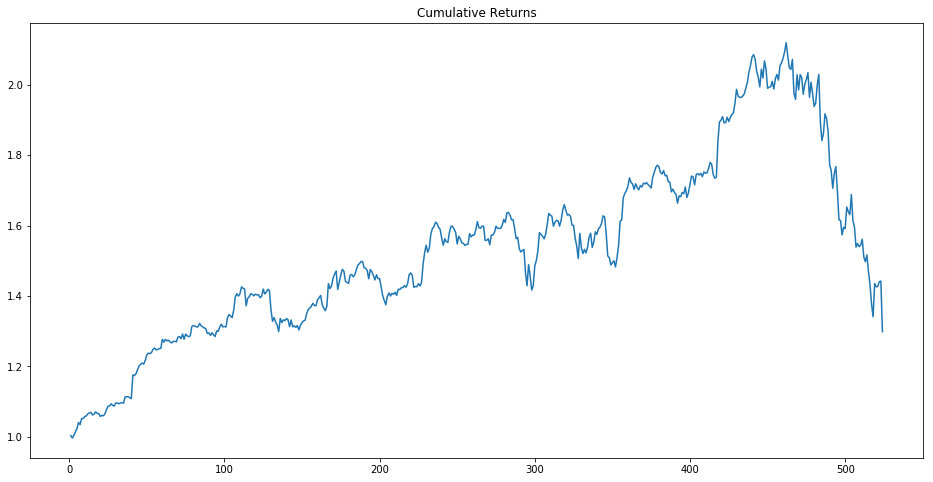

In [135]:
# Now plotting against time series index
apple_ne['cumulative return'].plot(label='APPLE',figsize=(16,8),title = 'Cumulative Returns')



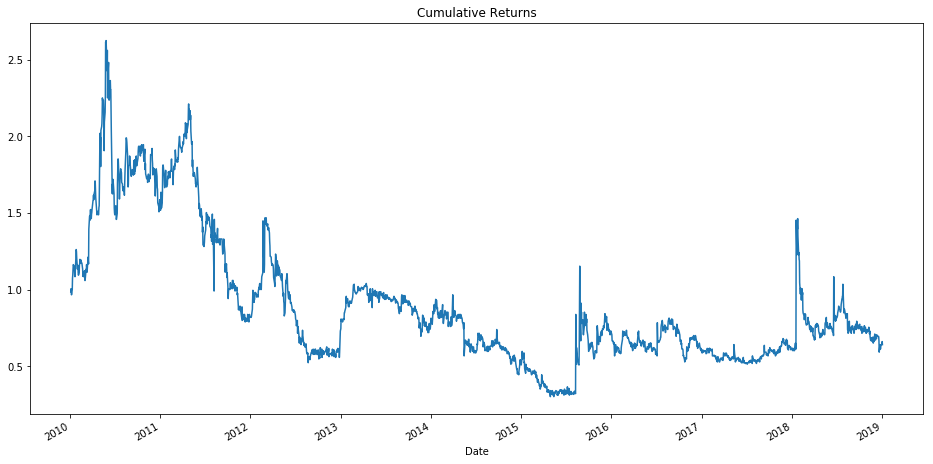

In [137]:
ford['cumulative return'].plot(label='FORD',figsize=(16,8),title = 'Cumulative Returns')


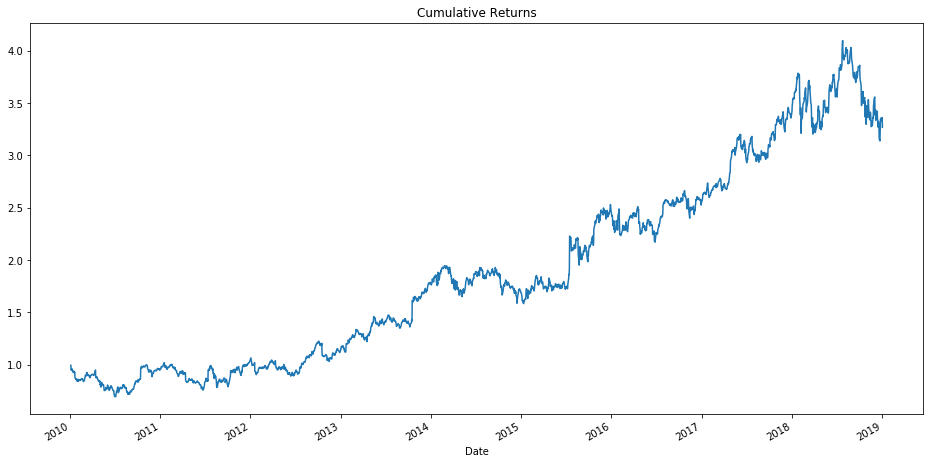

In [136]:
google['cumulative return'].plot(label='GOOGLE',figsize=(16,8),title = 'Cumulative Returns')


In [165]:
# Now we will add microsoft stocks too and getting all adjusted price and plotting them

from pandas_datareader import data as web
# We will look at stock prices over the past year, starting at January 1, 2016
start = datetime.datetime(2016,1,1)
end = datetime.date.today()

google_new = web.DataReader("GOOGL", "yahoo", start, end)
microsoft_new =  web.DataReader("MSFT", "yahoo", start, end)
ford_new =  web.DataReader("F", "yahoo", start, end)

stocks = pd.DataFrame({"MSFT": microsoft_new["Adj Close"],
                      "F": ford_new["Adj Close"],
                      "GOOG": google_new["Adj Close"]})
 
stocks.head()


,F,GOOG,MSFT
Date,,,
2016-01-04,10.819058,759.440002,50.708462
2016-01-05,10.625446,761.530029,50.939793
2016-01-06,10.153032,759.330017,50.014458
2016-01-07,9.835508,741.000000,48.274826
2016-01-08,9.711595,730.909973,48.422878


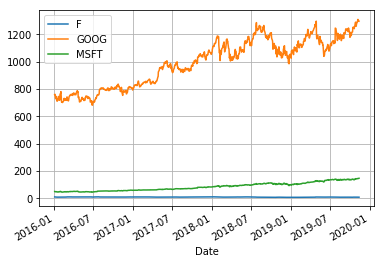

In [166]:
stocks.plot(grid=True)

In [169]:
# to see how profitable each stock is since the beinning we try to plot a new chart.
# so plotting the stock returns

stockReturn = stocks.apply(lambda x: x / x[0])
stockReturn.head()

,F,GOOG,MSFT
Date,,,
2016-01-04,1.000000,1.000000,1.000000
2016-01-05,0.982105,1.002752,1.004562
2016-01-06,0.938440,0.999855,0.986314
2016-01-07,0.909091,0.975719,0.952007
2016-01-08,0.897638,0.962433,0.954927


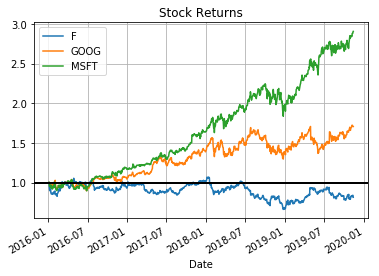

In [173]:
stockReturn.plot(grid = True, title = 'Stock Returns').axhline(y = 1, color = "black", lw = 2)

In [177]:
# Now plotting each stock change per day using log differences. 
stocksChange = stocks.apply(lambda x: np.log(x) - np.log(x.shift(1))) 
stocksChange.head()



,F,GOOG,MSFT
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,-0.018058,0.002748,0.004552
2016-01-06,-0.045479,-0.002893,-0.018332
2016-01-07,-0.031773,-0.024436,-0.035402
2016-01-08,-0.012679,-0.013710,0.003062


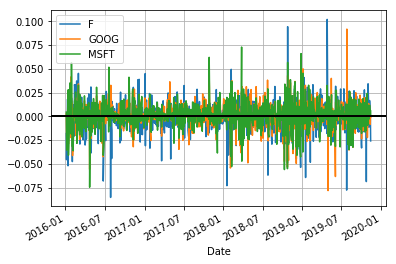

In [178]:
stocksChange.plot(grid = True).axhline(y = 0, color = "black", lw = 2)